# Homework 3_2

# 資料處理

## 1. 讀取資料集

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
with open("HW3_titanic.csv") as file:
    df = pd.read_csv(file)
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   ticket    1309 non-null   object 
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


,pclass,name,sex,age,sibsp,parch,fare,ticket,cabin,embarked,survived
0,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,15.5000,367230,NaN,Q,1
1,3,"Gallagher, Mr. Martin",male,25.0,0,0,7.7417,36864,NaN,Q,0
2,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,330920,NaN,Q,1
3,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,79.2000,PC 17593,B82 B84,C,0
4,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,3101265,NaN,S,1


多項資料不完整，並且不是以數值為資料型態，針對這些資料進行處理。

In [26]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413493,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


## 2. 處理Age缺失值
找出既有的分布情況，並且依照此分布填補缺失值。

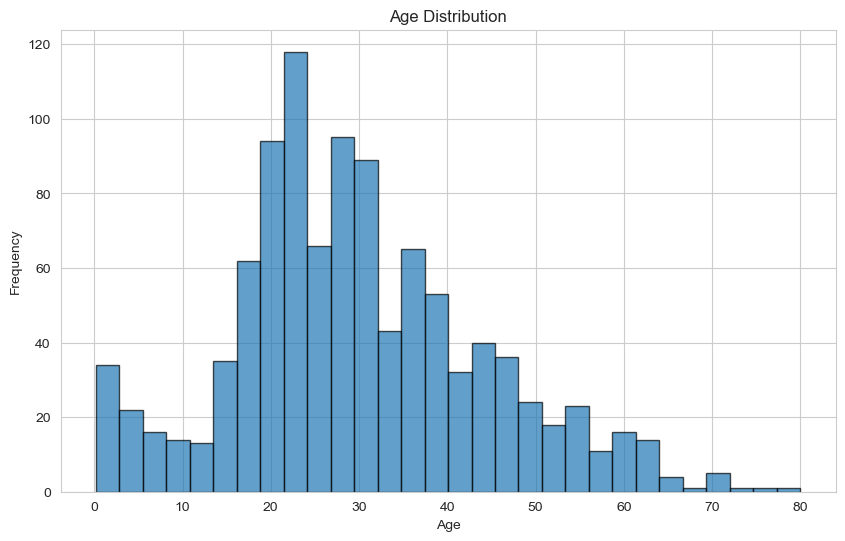

In [27]:
# Plot the histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# 填補AGE缺失值 以相同分布型態

從未缺失的資料中取值填補缺失值，由此就不會改變原本的資料分布情況

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   ticket    1309 non-null   object 
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


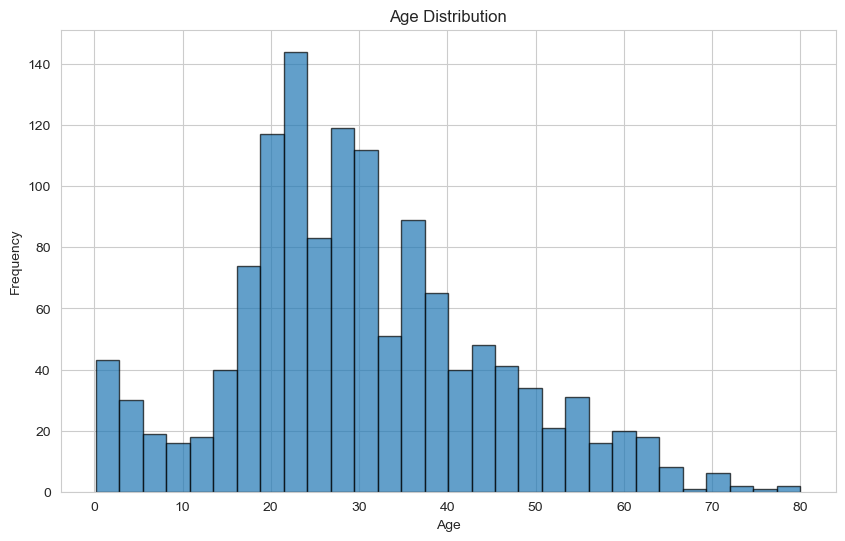

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,30.133751,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.633655,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [28]:
# Extract non-missing age values
age_non_missing = df['age'].dropna()

# Fill missing age values with random samples from the non-missing age values
df['age'] = df['age'].apply(lambda x: np.random.choice(age_non_missing) if pd.isnull(x) else x)

# Verify the result
df.info()

plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

df.describe()


## 3. 處理非數值資料Embarked
使用 one hot encoding 將embarked轉換為數值型態

In [29]:
# Perform one-hot encoding on the 'embarked' column
df_encoded = pd.get_dummies(df, columns=['embarked'], prefix='embarked')
# Convert boolean columns to integers
df_encoded['embarked_C'] = df_encoded['embarked_C'].astype(int)
df_encoded['embarked_Q'] = df_encoded['embarked_Q'].astype(int)
df_encoded['embarked_S'] = df_encoded['embarked_S'].astype(int)
# Verify the result
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   name        1309 non-null   object 
 2   sex         1309 non-null   object 
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   fare        1308 non-null   float64
 7   ticket      1309 non-null   object 
 8   cabin       295 non-null    object 
 9   survived    1309 non-null   int64  
 10  embarked_C  1309 non-null   int32  
 11  embarked_Q  1309 non-null   int32  
 12  embarked_S  1309 non-null   int32  
dtypes: float64(2), int32(3), int64(4), object(4)
memory usage: 117.7+ KB


,pclass,name,sex,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S
0,3,"Murphy, Miss. Katherine ""Kate""",female,17.0,1,0,15.5000,367230,NaN,1,0,1,0
1,3,"Gallagher, Mr. Martin",male,25.0,0,0,7.7417,36864,NaN,0,0,1,0
2,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,330920,NaN,1,0,1,0
3,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0
4,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,3101265,NaN,1,0,0,1


## 4. 處理非數值sex資料


In [30]:
# Perform one-hot encoding on the 'sex' column
df_encoded = pd.get_dummies(df_encoded, columns=['sex'], prefix='sex')

# Verify the result
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   name        1309 non-null   object 
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   ticket      1309 non-null   object 
 7   cabin       295 non-null    object 
 8   survived    1309 non-null   int64  
 9   embarked_C  1309 non-null   int32  
 10  embarked_Q  1309 non-null   int32  
 11  embarked_S  1309 non-null   int32  
 12  sex_female  1309 non-null   bool   
 13  sex_male    1309 non-null   bool   
dtypes: bool(2), float64(2), int32(3), int64(4), object(3)
memory usage: 110.1+ KB


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,True,False
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,False,True
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,False,True
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,False,True
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,True,False


將boolean轉換為integer

In [31]:
df_encoded['sex_female'] = df_encoded['sex_female'].astype(int)
df_encoded['sex_male'] = df_encoded['sex_male'].astype(int)

# Verify the result
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   name        1309 non-null   object 
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   ticket      1309 non-null   object 
 7   cabin       295 non-null    object 
 8   survived    1309 non-null   int64  
 9   embarked_C  1309 non-null   int32  
 10  embarked_Q  1309 non-null   int32  
 11  embarked_S  1309 non-null   int32  
 12  sex_female  1309 non-null   int32  
 13  sex_male    1309 non-null   int32  
dtypes: float64(2), int32(5), int64(4), object(3)
memory usage: 117.7+ KB


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0


## 檢查稱謂
猜測稱謂與存活可能會有關連性，所以先從名稱欄位中將不同稱謂分出來。

In [32]:
import re
# Extract the titles from the 'name' column
def extract_title(name):
    # Use regex to search for a title
    title_search = re.search(r'\b([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return 'Unknown'

# Apply the function to extract titles
df_encoded['title'] = df_encoded['name'].apply(extract_title)

# Get the unique titles
unique_titles = df_encoded['title'].unique()

# Print all unique titles
print(f"Unique Titles: {unique_titles}")

df_encoded.head(10)

Unique Titles: ['Miss' 'Mr' 'Mrs' 'Master' 'Mlle' 'Dr' 'Rev' 'Capt' 'Sir' 'Col' 'Major'
 'Lady' 'Don' 'Ms' 'Mme' 'Countess' 'Dona' 'Jonkheer']


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss
5,3,"Rommetvedt, Mr. Knud Paust",40.0,0,0,7.7750,312993,NaN,0,0,0,1,0,1,Mr
6,3,"Vander Planke, Mr. Leo Edmondus",16.0,2,0,18.0000,345764,NaN,0,0,0,1,0,1,Mr
7,2,"Hunt, Mr. George Henry",33.0,0,0,12.2750,SCO/W 1585,NaN,0,0,0,1,0,1,Mr
8,3,"Sivic, Mr. Husein",40.0,0,0,7.8958,349251,NaN,0,0,0,1,0,1,Mr
9,1,"Chaffee, Mr. Herbert Fuller",46.0,1,0,61.1750,W.E.P. 5734,E31,0,0,0,1,0,1,Mr


## 5. 處理稱謂資料
從稱謂資料中分類成幾個大類(貴族，學術，軍人，宗教，外國，平民等種類)，並且進行one-hot encoding。

In [33]:
# Function to group titles
def group_titles(title):
    # Nobility
    if title in ['Lady', 'Countess', 'Sir', 'Don', 'Dona', 'Jonkheer']:
        return 'Nobility'
    # Military
    elif title in ['Capt', 'Major', 'Col']:
        return 'Military'
    # Clergy
    elif title == 'Rev':
        return 'Clergy'
    # Academic/Professional
    elif title == 'Dr':
        return 'Academic/Professional'
    # Foreign (French honorifics)
    elif title in ['Mlle', 'Mme']:
        return 'Foreign'
    # Common Citizens
    elif title in ['Mr', 'Miss', 'Mrs', 'Ms', 'Master']:
        return 'Common Citizen'
    else:
        return 'Other'

# Apply the grouping function to the 'title' column
df_encoded['title_grouped'] = df_encoded['title'].apply(group_titles)

# Check the unique grouped titles
print(df_encoded['title_grouped'].unique())

# Optional: Analyze survival rates by title group
survival_by_group = df_encoded.groupby('title_grouped')['survived'].mean()
print(survival_by_group)
df_encoded.head(10)

['Common Citizen' 'Foreign' 'Academic/Professional' 'Clergy' 'Military'
 'Nobility']
title_grouped
Academic/Professional    0.500000
Clergy                   0.000000
Common Citizen           0.380579
Foreign                  1.000000
Military                 0.428571
Nobility                 0.666667
Name: survived, dtype: float64


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_grouped
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,Common Citizen
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,Common Citizen
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,Common Citizen
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,Common Citizen
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,Common Citizen
5,3,"Rommetvedt, Mr. Knud Paust",40.0,0,0,7.7750,312993,NaN,0,0,0,1,0,1,Mr,Common Citizen
6,3,"Vander Planke, Mr. Leo Edmondus",16.0,2,0,18.0000,345764,NaN,0,0,0,1,0,1,Mr,Common Citizen
7,2,"Hunt, Mr. George Henry",33.0,0,0,12.2750,SCO/W 1585,NaN,0,0,0,1,0,1,Mr,Common Citizen
8,3,"Sivic, Mr. Husein",40.0,0,0,7.8958,349251,NaN,0,0,0,1,0,1,Mr,Common Citizen
9,1,"Chaffee, Mr. Herbert Fuller",46.0,1,0,61.1750,W.E.P. 5734,E31,0,0,0,1,0,1,Mr,Common Citizen


查看稱謂是否跟生存率有相關

In [34]:
title_group_counts = df_encoded.groupby('title_grouped').agg(
    total_count=('survived', 'size'),  # Total number in each group
    survived_count=('survived', 'sum')  # Total number of survivors in each group
).reset_index()

# Display the counts
print(title_group_counts)

           title_grouped  total_count  survived_count
0  Academic/Professional            8               4
1                 Clergy            8               0
2         Common Citizen         1277             486
3                Foreign            3               3
4               Military            7               3
5               Nobility            6               4


將稱謂類別精簡，避免會有太多稱謂類別

In [35]:
# Function to group titles into "Common Citizen" or "Elite"
def group_titles(title):
    # Group into "Elite"
    if title in ['Lady', 'Countess', 'Sir', 'Don', 'Dona', 'Jonkheer', 'Capt', 'Major', 'Col', 'Dr', 'Rev', 'Mlle', 'Mme']:
        return 'Elite'
    # Group the rest as "Common Citizen"
    elif title in ['Mr', 'Miss', 'Mrs', 'Ms', 'Master']:
        return 'Common Citizen'
    else:
        return 'Other'

# Apply the grouping function to the 'title' column
df_encoded['title_grouped'] = df_encoded['title'].apply(group_titles)

# Calculate total count and survival count for each group
group_counts = df_encoded.groupby('title_grouped').agg(
    total_count=('survived', 'size'),  # Total number in each group
    survived_count=('survived', 'sum')  # Total number of survivors in each group
).reset_index()

# Display the counts
print(group_counts)
survival_by_group = df_encoded.groupby('title_grouped')['survived'].mean()
print(survival_by_group)
df_encoded.head(10)

    title_grouped  total_count  survived_count
0  Common Citizen         1277             486
1           Elite           32              14
title_grouped
Common Citizen    0.380579
Elite             0.437500
Name: survived, dtype: float64


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_grouped
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,Common Citizen
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,Common Citizen
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,Common Citizen
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,Common Citizen
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,Common Citizen
5,3,"Rommetvedt, Mr. Knud Paust",40.0,0,0,7.7750,312993,NaN,0,0,0,1,0,1,Mr,Common Citizen
6,3,"Vander Planke, Mr. Leo Edmondus",16.0,2,0,18.0000,345764,NaN,0,0,0,1,0,1,Mr,Common Citizen
7,2,"Hunt, Mr. George Henry",33.0,0,0,12.2750,SCO/W 1585,NaN,0,0,0,1,0,1,Mr,Common Citizen
8,3,"Sivic, Mr. Husein",40.0,0,0,7.8958,349251,NaN,0,0,0,1,0,1,Mr,Common Citizen
9,1,"Chaffee, Mr. Herbert Fuller",46.0,1,0,61.1750,W.E.P. 5734,E31,0,0,0,1,0,1,Mr,Common Citizen


In [36]:
# Perform one-hot encoding on the 'title_grouped' column
df_encoded = pd.get_dummies(df_encoded, columns=['title_grouped'], prefix='title')
df_encoded.head()


,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_Common Citizen,title_Elite
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,True,False
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,True,False
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,True,False
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,True,False
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,True,False


將boolean轉換為integer

In [37]:
df_encoded['title_Common Citizen'] = df_encoded['title_Common Citizen'].astype(int)
df_encoded['title_Elite'] = df_encoded['title_Elite'].astype(int)
df_encoded.head(20)

,pclass,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_Common Citizen,title_Elite
0,3,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,1,0
1,3,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,1,0
2,3,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,1,0
3,1,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,1,0
4,3,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,1,0
5,3,"Rommetvedt, Mr. Knud Paust",40.0,0,0,7.7750,312993,NaN,0,0,0,1,0,1,Mr,1,0
6,3,"Vander Planke, Mr. Leo Edmondus",16.0,2,0,18.0000,345764,NaN,0,0,0,1,0,1,Mr,1,0
7,2,"Hunt, Mr. George Henry",33.0,0,0,12.2750,SCO/W 1585,NaN,0,0,0,1,0,1,Mr,1,0
8,3,"Sivic, Mr. Husein",40.0,0,0,7.8958,349251,NaN,0,0,0,1,0,1,Mr,1,0
9,1,"Chaffee, Mr. Herbert Fuller",46.0,1,0,61.1750,W.E.P. 5734,E31,0,0,0,1,0,1,Mr,1,0


## 6.處理pclass資料
ont-hot encoding不同的pclass

In [38]:
# Perform one-hot encoding on the 'pclass' column
df_encoded = pd.get_dummies(df_encoded, columns=['pclass'], prefix='pclass')
df_encoded.head()

,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_Common Citizen,title_Elite,pclass_1,pclass_2,pclass_3
0,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,1,0,False,False,True
1,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,1,0,False,False,True
2,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,1,0,False,False,True
3,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,1,0,True,False,False
4,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,1,0,False,False,True


In [39]:
df_encoded['pclass_1'] = df_encoded['pclass_1'].astype(int)
df_encoded['pclass_2'] = df_encoded['pclass_2'].astype(int)
df_encoded['pclass_3'] = df_encoded['pclass_3'].astype(int)
df_encoded.head()

,name,age,sibsp,parch,fare,ticket,cabin,survived,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title,title_Common Citizen,title_Elite,pclass_1,pclass_2,pclass_3
0,"Murphy, Miss. Katherine ""Kate""",17.0,1,0,15.5000,367230,NaN,1,0,1,0,1,0,Miss,1,0,0,0,1
1,"Gallagher, Mr. Martin",25.0,0,0,7.7417,36864,NaN,0,0,1,0,0,1,Mr,1,0,0,0,1
2,"Buckley, Mr. Daniel",21.0,0,0,7.8208,330920,NaN,1,0,1,0,0,1,Mr,1,0,0,0,1
3,"Guggenheim, Mr. Benjamin",46.0,0,0,79.2000,PC 17593,B82 B84,0,1,0,0,0,1,Mr,1,0,1,0,0
4,"Sjoblom, Miss. Anna Sofia",18.0,0,0,7.4958,3101265,NaN,1,0,0,1,1,0,Miss,1,0,0,0,1


# 將不需要的欄位去除
名字與稱謂已經處理過了所以去除，cabin與ticket資料過於雜亂並且cabin的資料缺失過多，所以也去除。

In [40]:
df_cleaned = df_encoded.drop(columns=['name', 'title', 'cabin', "ticket"])

# Display the cleaned DataFrame
df_cleaned.head()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1309 non-null   float64
 1   sibsp                 1309 non-null   int64  
 2   parch                 1309 non-null   int64  
 3   fare                  1308 non-null   float64
 4   survived              1309 non-null   int64  
 5   embarked_C            1309 non-null   int32  
 6   embarked_Q            1309 non-null   int32  
 7   embarked_S            1309 non-null   int32  
 8   sex_female            1309 non-null   int32  
 9   sex_male              1309 non-null   int32  
 10  title_Common Citizen  1309 non-null   int32  
 11  title_Elite           1309 non-null   int32  
 12  pclass_1              1309 non-null   int32  
 13  pclass_2              1309 non-null   int32  
 14  pclass_3              1309 non-null   int32  
dtypes: float64(2), int32(

# 訓練logistic regression模型
將訓練與測試資料集分開，並且訓練logistic regression模型。
為避免資料偏頗，使用stratified train-test split。避免任一資料集有不均的生存數量


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 填補一筆fare缺失值
df_cleaned['fare'].fillna(df_encoded['fare'].median(), inplace=True)

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['survived'])  # Features
y = df_cleaned['survived']                 # Target variable

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


驗證是否均勻分布在訓練與測試資料集

In [42]:
# Calculate and print the survival rate in the full dataset
full_survival_rate = y.mean()
print(f"Survival rate in full dataset: {full_survival_rate:.2f}")

# Calculate and print the survival rate in the training set
train_survival_rate = y_train.mean()
print(f"Survival rate in training set: {train_survival_rate:.2f}")

# Calculate and print the survival rate in the test set
test_survival_rate = y_test.mean()
print(f"Survival rate in test set: {test_survival_rate:.2f}")

Survival rate in full dataset: 0.38
Survival rate in training set: 0.38
Survival rate in test set: 0.38


# 訓練logistic regression模型

In [43]:
# Initialize and train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)


In [44]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Set up 3-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
cross_val_scores = cross_val_score(log_reg, X, y, cv=stratified_kfold, scoring='accuracy')

# Display the results
print("Three fold Cross-validation scores for each fold:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

Three fold Cross-validation scores for each fold: [0.75514874 0.80275229 0.80045872]
Mean cross-validation accuracy: 0.7861199168643588


# logistic regression結論
透過cross-validation的結果可以看出，logistic regression的平均準確率為0.786

# using decision tree as training model
用3 fold cross vaildation 來評估決策樹表現情況

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# 3 fold cross vaildation 以及均勻分配生存率於不同的資料集內
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores for each fold
cross_val_scores = cross_val_score(tree_clf, X, y, cv=stratified_kfold, scoring='accuracy')

# Display the results
print("Three fold Cross-validation accuracy scores for each fold:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

Three fold Cross-validation accuracy scores for each fold: [0.76887872 0.77981651 0.80963303]
Mean cross-validation accuracy: 0.7861094199399575


# Decision Tree結論
透過cross-validation的結果可以看出，Decision Tree的平均準確率為0.786
